<a href="https://colab.research.google.com/github/Suyashm7/OIBSIP-02/blob/main/OIBSIP_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Unemployment Analysis using Python


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set(style="whitegrid")

df = pd.read_csv('Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [64]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [66]:
df.shape

(768, 7)

In [67]:
df.dropna(axis = 0, inplace = True)

In [68]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [69]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [70]:
if ' Date' in df.columns:
    df[' Date'] = pd.to_datetime(df[' Date'])
else:
    raise KeyError("' Date' column not found in the DataFrame. Available columns are: " + ', '.join(df.columns))


<ipython-input-70-544e6c117252>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


In [71]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


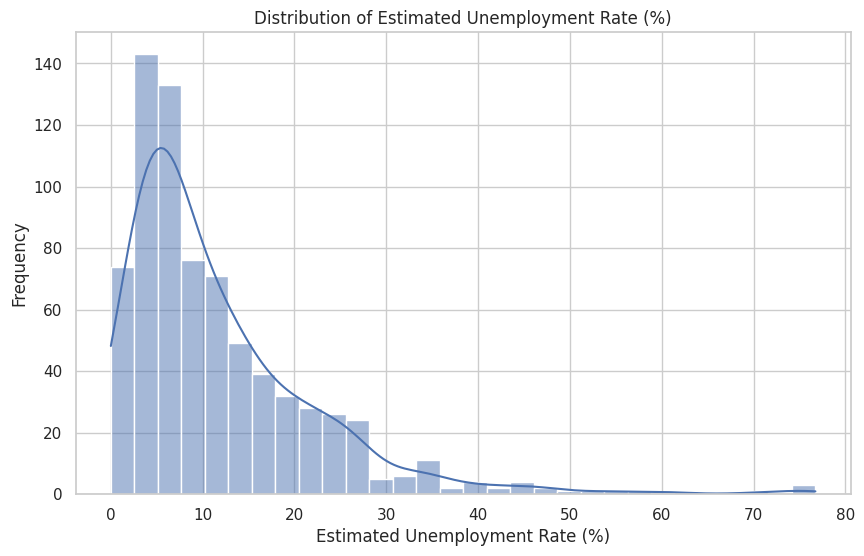

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=30, kde=True)
plt.title('Distribution of Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

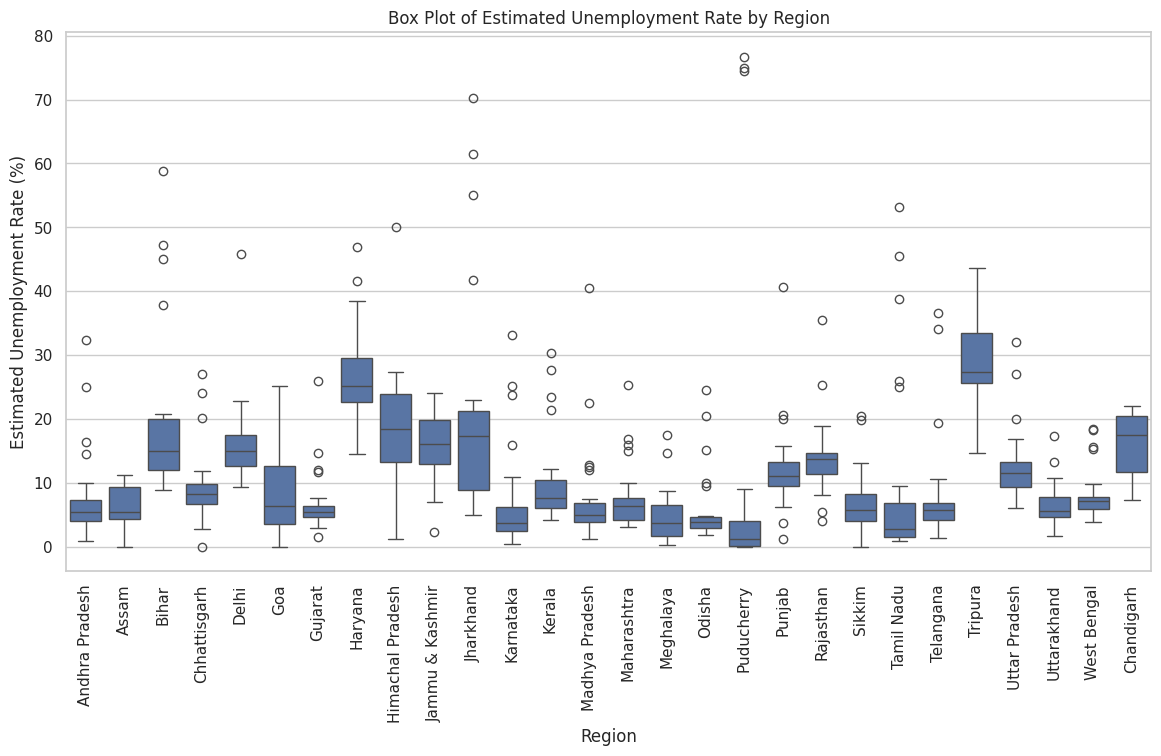

In [75]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=90)
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.show()

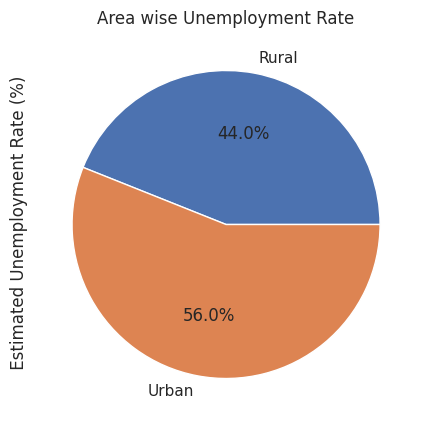

In [76]:
plt.figure(figsize=(10,5))
df.groupby('Area')[' Estimated Unemployment Rate (%)'].mean().plot(kind='pie', autopct='%1.1f%%')
plt.title('Area wise Unemployment Rate')
plt.show()

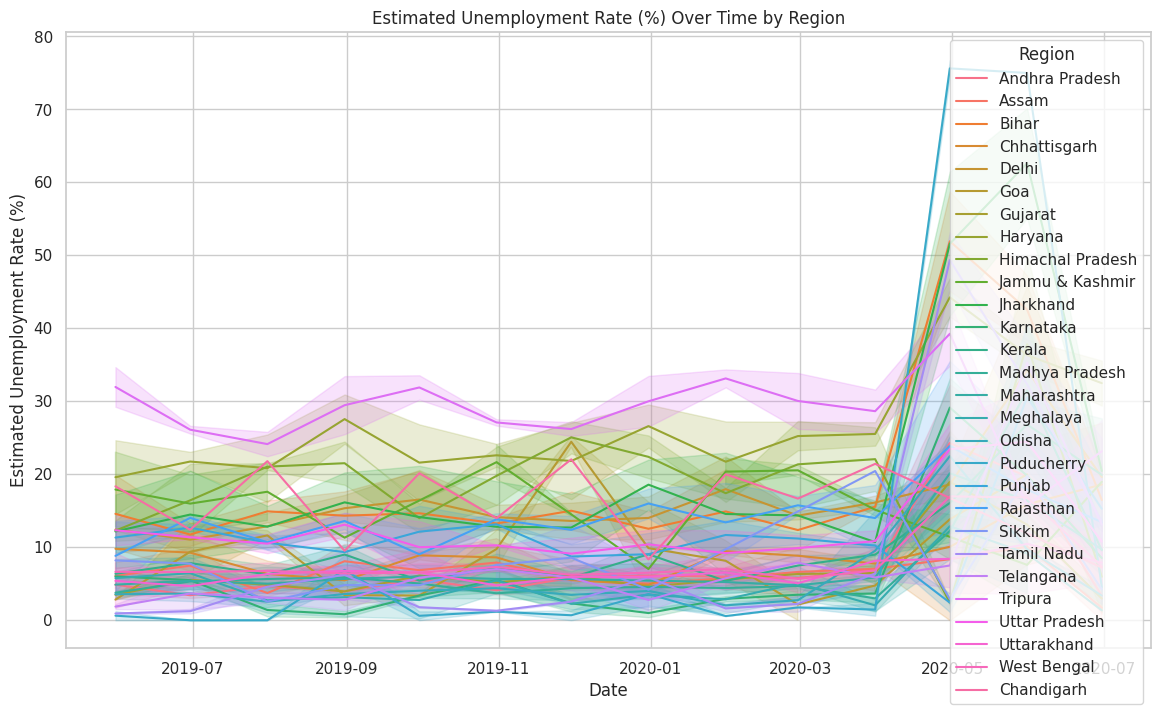

In [77]:
plt.figure(figsize=(14, 8))
sns.lineplot(x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.title('Estimated Unemployment Rate (%) Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Region')
plt.show()

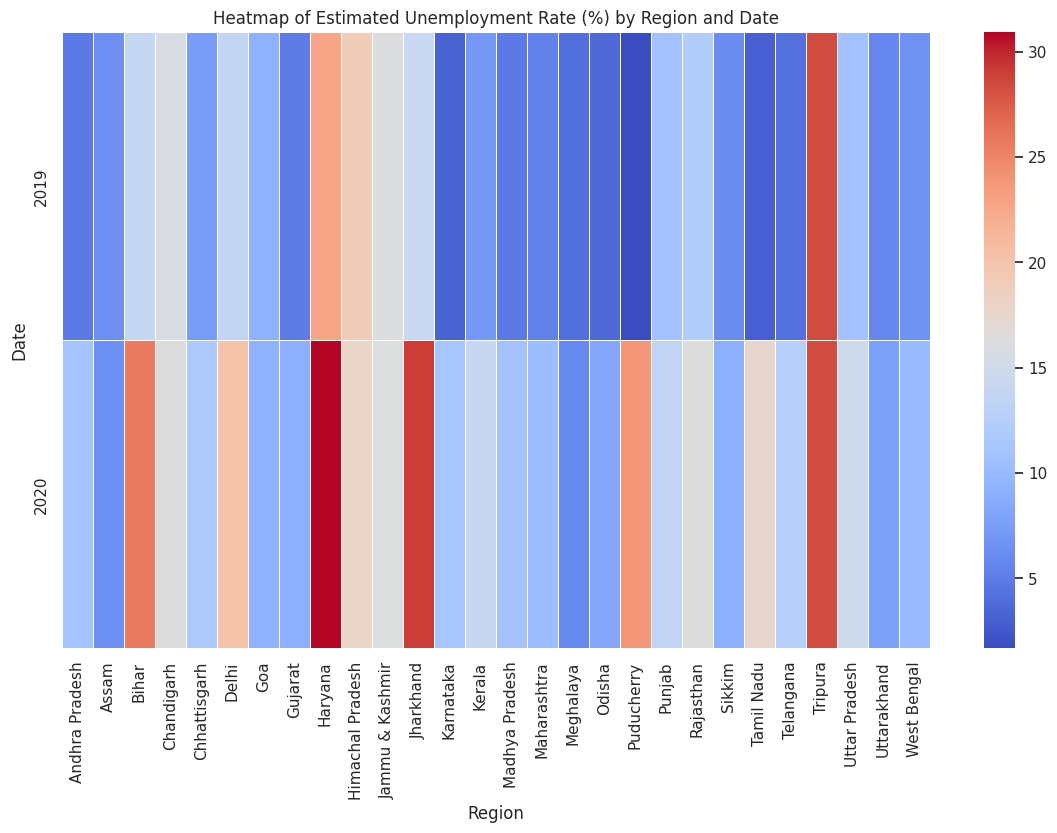

In [79]:
df['Year'] = df[' Date'].dt.year
pivot = df.pivot_table(values=' Estimated Unemployment Rate (%)', index='Year', columns='Region')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Estimated Unemployment Rate (%) by Region and Date')
plt.xlabel('Region')
plt.ylabel('Date')
plt.show()
